In [1]:
#first we pip install kagglehub in console
import kagglehub as kh
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import torch
nltk.download('punkt_tab')

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/annamicros/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/annamicros/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/annamicros/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import zipfile
import os
import numpy as np 
import matplotlib.pyplot as plt

zip_file_path = "/Users/annamicros/Desktop/Fall24Classes/AML/MyCode/archive.zip"  
output_dir = "/Users/annamicros/Desktop/Fall24Classes/AML/MyCode"  
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

In [3]:
import pandas as pd 
imdb_df= pd.read_csv("/Users/annamicros/Desktop/Fall24Classes/AML/MyCode/IMDB Dataset.csv")

pd.set_option('future.no_silent_downcasting', True)
imdb_df['sentiment']= imdb_df['sentiment'].replace({ 'negative':0, 'positive' :1})

In [4]:
imdb_df


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


Text(0, 0.5, 'Count')

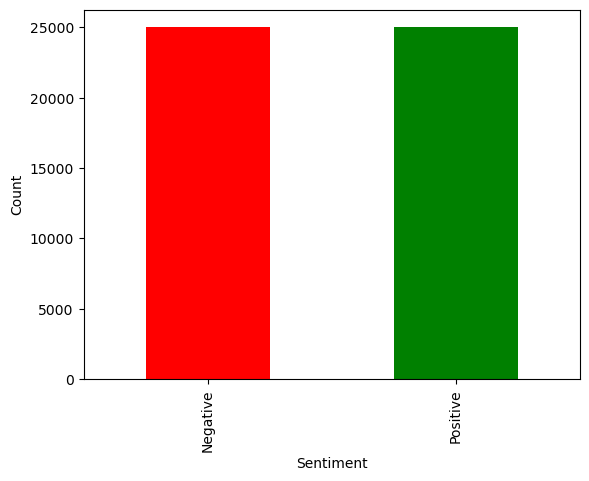

In [5]:
class_balance= imdb_df['sentiment'].value_counts()
ax= class_balance.plot(kind='bar', color= ['Red', 'Green'])
ax.set_xticklabels(['Negative', 'Positive'])
plt.xlabel('Sentiment')
plt.ylabel('Count')

In [6]:
print(class_balance)

sentiment
1    25000
0    25000
Name: count, dtype: int64


In [7]:
imdb_df['has_backslash']= imdb_df['review'].str.contains('/' , regex=True)


In [8]:
specific_review = imdb_df.iloc[32]['review']
print(specific_review)


My first exposure to the Templarios & not a good one. I was excited to find this title among the offerings from Anchor Bay Video, which has brought us other cult classics such as "Spider Baby". The print quality is excellent, but this alone can't hide the fact that the film is deadly dull. There's a thrilling opening sequence in which the villagers exact a terrible revenge on the Templars (& set the whole thing in motion), but everything else in the movie is slow, ponderous &, ultimately, unfulfilling. Adding insult to injury: the movie was dubbed, not subtitled, as promised on the video jacket.


In [9]:
#cleaning process

imdb_df['review']= (
    imdb_df['review']
    .str.replace('[,\.!?:()"]', '', regex=True)        
    .str.replace('<.*?>', ' ' , regex= True)
    .str.replace('http\S+', ' ', regex=True)          
    .str.replace('[^a-zA-Z0-9]', ' ', regex=True)
    .str.replace('\s+', ' ', regex=True)               
    .str.lower()                                      
    .str.strip()                                      
)

                 

<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/var/folders/0c/34zjr7695dl8wv2s6qkldncm0000gn/T/ipykernel_86338/2413098409.py:5: SyntaxWarning: invalid escape sequence '\.'
  .str.replace('[,\.!?:()"]', '', regex=True)
/var/folders/0c/34zjr7695dl8wv2s6qkldncm0000gn/T/ipykernel_86338/2413098409.py:7: SyntaxWarning: invalid escape sequence '\S'
  .str.replace('http\S+', ' ', regex=True)
/var/folders/0c/34zjr7695dl8wv2s6qkldncm0000gn/T/ipykernel_86338/2413098409.py:9: SyntaxWarning: invalid escape sequence '\s'
  .str.replace('\s+', ' ', regex=True)


In [10]:
total_len_old = 0
total_words_old = 0
num_rows = len(imdb_df)
for comment in imdb_df['review']:
  total_len_old += len(comment)
  total_words_old += len(comment.split())
avg_len_old = total_len_old/num_rows
avg_words_old = total_words_old/num_rows

In [11]:
sw_set = set(nltk.corpus.stopwords.words('english'))

def sw_remove(x):
    words = nltk.tokenize.word_tokenize(x)
    filtered_list = [word for word in words if word not in sw_set]
    return ' '.join(filtered_list)

imdb_df['review'] = imdb_df['review'].apply(lambda x: sw_remove(x))
after_tokenize= imdb_df.iloc[4]['review']
print(after_tokenize)

petter mattei love time money visually stunning film watch mr mattei offers us vivid portrait human relations movie seems telling us money power success people different situations encounter variation arthur schnitzler play theme director transfers action present time new york different characters meet connect one connected one way another next person one seems know previous point contact stylishly film sophisticated luxurious look taken see people live world live habitat thing one gets souls picture different stages loneliness one inhabits big city exactly best place human relations find sincere fulfillment one discerns case people encounter acting good mr mattei direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make characters come alive wish mr mattei good luck await anxiously next work


In [12]:
total_len_new = 0
total_words_new = 0
num_rows = len(imdb_df)
for comment in imdb_df['review']:
  total_len_new += len(comment)
  total_words_new += len(comment.split())
avg_len_new = total_len_new/num_rows
avg_words_new = total_words_new/num_rows
print("Average length of comment prior to scrubbing: ", str(avg_len_old))
print("Average number of words per comment prior to scrubbing: ", str(avg_words_old))
print("Average length of comment after scrubbing: ", str(avg_len_new))
print("Average number of words per comment after scrubbing: ", str(avg_words_new))

Average length of comment prior to scrubbing:  1252.04628
Average number of words per comment prior to scrubbing:  234.746
Average length of comment after scrubbing:  819.49708
Average number of words per comment after scrubbing:  119.32778


In [13]:
def get_ngrams(sequence, n):
    """
    returns list of n-grams, where each ngram is represented by a tuple of size = n
    """
    sequence_copy = sequence.copy()
    sequence_copy.append('STOP')
    initial_list = []
    n_gram_list = []
    seq_len = len(sequence_copy)

    initial_list.extend([sequence_copy[0:0 + i] for i in range(1, min(n, seq_len+1), 1)])

    # pad lists with 'START'
    for n_gram in initial_list:
        num_starts = n - len(n_gram)
        start_list = ['START'] * num_starts
        n_gram_list.append(start_list + n_gram)

    if n == 1:
        n_gram_list.append(['START'])

    if seq_len >= n:
        n_gram_list.extend([sequence_copy[i:i+n] for i in range(0, seq_len-n+1, 1)])

    n_gram_list = [tuple(x) for x in n_gram_list]
    return n_gram_list

In [14]:
unigrams = {}
bigrams = {}
trigrams = {}

for comment in imdb_df['review']:
  sequence = comment.split()
  uni_gram_list = get_ngrams(sequence, 1)
  for uni_gram in uni_gram_list:
    count = 0
    if uni_gram in unigrams.keys():
      count = unigrams[uni_gram]
    unigrams[uni_gram] = count + 1

  bi_gram_list = get_ngrams(sequence, 2)
  for bi_gram in bi_gram_list:
    count = 0
    if bi_gram in bigrams.keys():
      count = bigrams[bi_gram]
    bigrams[bi_gram] = count + 1

  tri_gram_list = get_ngrams(sequence, 3)
  for tri_gram in tri_gram_list:
    count = 0
    if tri_gram in trigrams.keys():
      count = trigrams[tri_gram]
    trigrams[tri_gram] = count + 1

In [15]:
print("Total number of unique tokens: ", str(len(unigrams.keys())))
print("Total number of unique bigrams: ", str(len(bigrams.keys())))
print("Total number of unique trigrams: ", str(len(trigrams.keys())))

Total number of unique tokens:  125793
Total number of unique bigrams:  3184488
Total number of unique trigrams:  5524069


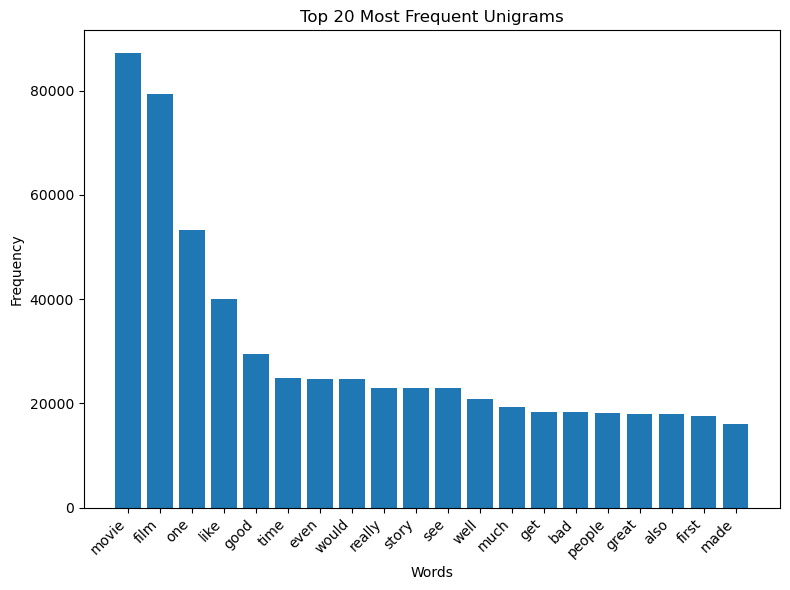

In [16]:
sorted_unigrams = sorted(unigrams.items(), key=lambda x: x[1], reverse=True)

top_20 = []
word_labels = []
word_counts = []
for k, v in sorted_unigrams:
  if 'STOP' not in k and 'START' not in k:
    word_labels.append(k[0])
    word_counts.append(v)
  if len(word_counts) == 20:
    break

# Plot the top 20 unigrams
plt.figure(figsize=(8, 6))
plt.bar(word_labels, word_counts)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Unigrams")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

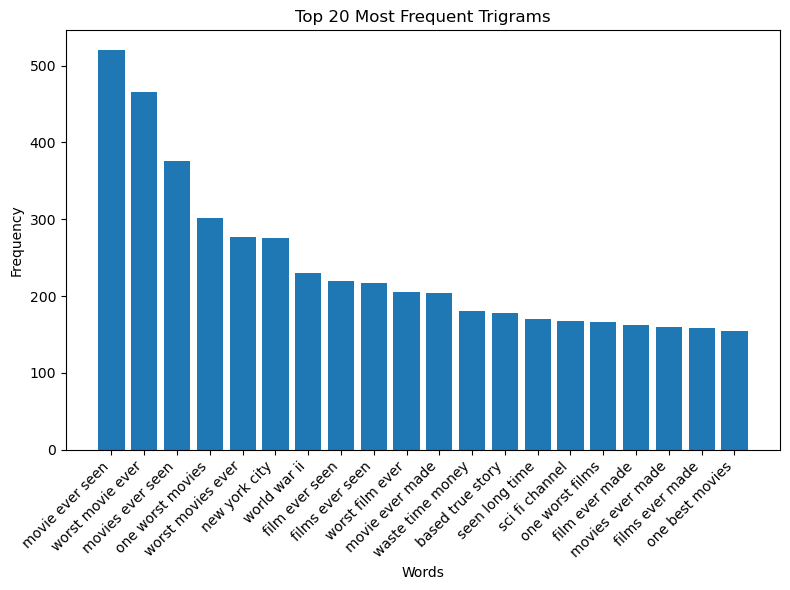

In [18]:
sorted_trigrams = sorted(trigrams.items(), key=lambda x: x[1], reverse=True)

top_20 = []
word_labels = []
word_counts = []
for k, v in sorted_trigrams:
  if 'STOP' not in k and 'START' not in k:
    word_labels.append(k[0] + " " + k[1] + " " + k[2])
    word_counts.append(v)
  if len(word_counts) == 20:
    break

# Plot the top 20 trigrams
plt.figure(figsize=(8, 6))
plt.bar(word_labels, word_counts)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Trigrams")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

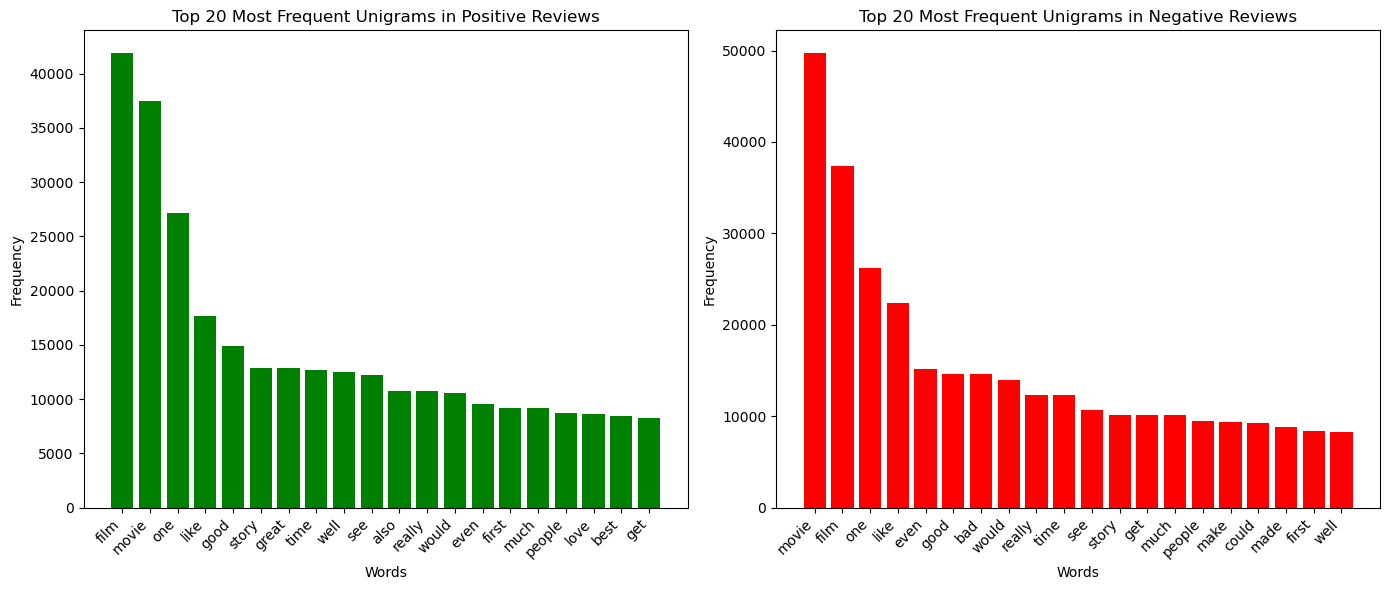

In [19]:
positive_reviews = imdb_df[imdb_df['sentiment'] == 1]['review']
negative_reviews = imdb_df[imdb_df['sentiment'] == 0]['review']

def generate_unigrams(reviews):
    unigrams = {}
    for review in reviews:
        sequence = review.split()
        uni_gram_list = get_ngrams(sequence, 1)
        for uni_gram in uni_gram_list:
            if 'STOP' not in uni_gram and 'START' not in uni_gram:
                unigrams[uni_gram] = unigrams.get(uni_gram, 0) + 1
    return unigrams

positive_unigrams=generate_unigrams(positive_reviews)
negative_unigrams=generate_unigrams(negative_reviews)

def get_top_unigrams(unigram_dict, top_n=20):
    sorted_unigrams = sorted(unigram_dict.items(), key=lambda x: x[1], reverse=True)
    word_labels = [k[0] for k, v in sorted_unigrams[:top_n]]
    word_counts = [v for k, v in sorted_unigrams[:top_n]]
    return word_labels, word_counts

#top 20 unigrams for positive and negative reviews
top_positive_words, top_positive_counts = get_top_unigrams(positive_unigrams, 20)
top_negative_words, top_negative_counts = get_top_unigrams(negative_unigrams, 20)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.bar(top_positive_words, top_positive_counts, color='green')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Unigrams in Positive Reviews")
plt.xticks(rotation=45, ha="right")


plt.subplot(1, 2, 2)
plt.bar(top_negative_words, top_negative_counts, color='red')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Unigrams in Negative Reviews")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


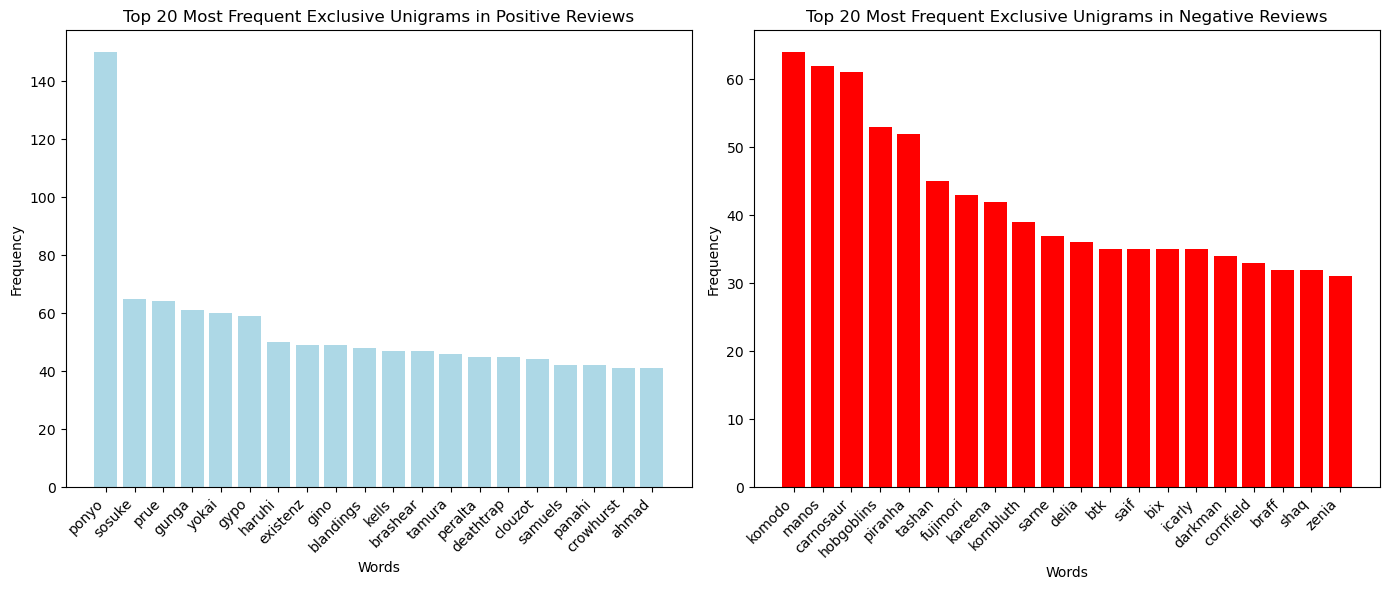

In [20]:
#separate unigrams
pos_unigrams= generate_unigrams(positive_reviews)
neg_unigrams= generate_unigrams(negative_reviews)

# exclude common words
common_words=set(pos_unigrams.keys()).intersection(set(neg_unigrams.keys()))
exclusive_pos_unigrams = {k: v for k, v in pos_unigrams.items() if k not in common_words}
exclusive_neg_unigrams = {k: v for k, v in neg_unigrams.items() if k not in common_words}

exclusive_positive, positive_counts = get_top_unigrams(exclusive_pos_unigrams, 20)
exclusive_negative, negative_counts = get_top_unigrams(exclusive_neg_unigrams, 20)
plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
plt.bar(exclusive_positive, positive_counts, color='lightblue')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Exclusive Unigrams in Positive Reviews")
plt.xticks(rotation=45, ha="right")

#Plot2
plt.subplot(1, 2, 2)
plt.bar(exclusive_negative, negative_counts, color='red')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Exclusive Unigrams in Negative Reviews")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


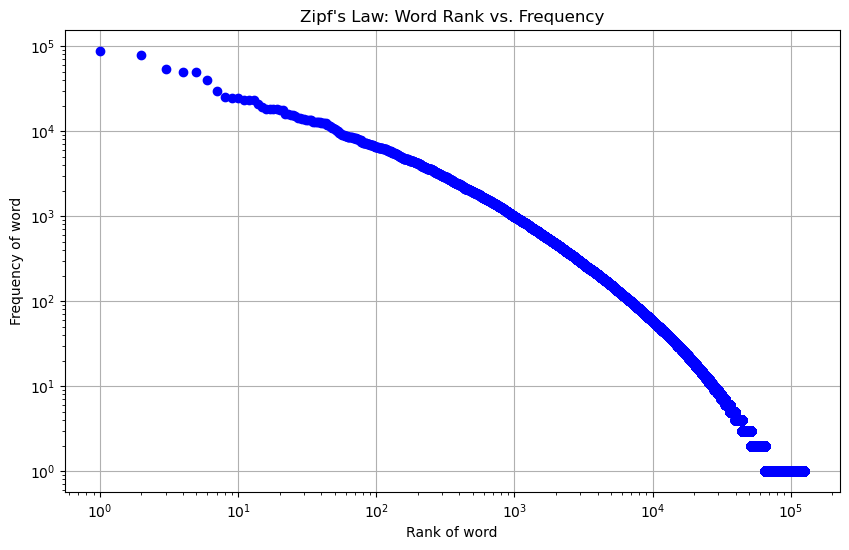

In [21]:
# Zipf's Law Graphs 
# get sorted list of num times a word occurs
frequencies = np.array(sorted(unigrams.values(), reverse=True))

# get corrsponding rank for each word
ranks = np.arange(1, len(frequencies) + 1)

plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker="o", linestyle="none", color="b")
plt.title("Zipf's Law: Word Rank vs. Frequency")
plt.xlabel("Rank of word")
plt.ylabel("Frequency of word")
plt.grid(True)
plt.show()

In [27]:
imdb_df['sentiment'] = imdb_df['sentiment'].replace({'negative': 0, 'positive': 1})
X = imdb_df['review'].tolist()
y = imdb_df['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
def get_bert_embeddings(texts, tokenizer, model, max_length=128):
    inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=max_length)
    with torch.no_grad():
        outputs = model(**inputs)
        embeddings = outputs.last_hidden_state[:, 0, :]
    return embeddings.numpy()
X_train_embeddings = get_bert_embeddings(X_train, tokenizer, bert_model)
X_test_embeddings = get_bert_embeddings(X_test, tokenizer, bert_model)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_embeddings, y_train)

y_pred = rf_model.predict(X_test_embeddings)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
#GloVe
def load_glove_embeddings(GloveFile):

    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

glove_path = "/path/to/glove.6B.50d.txt" 
glove_embeddings = load_glove_embeddings(GloveFile)
print(f"Loaded {len(glove_embeddings)} word vectors.")


In [ ]:
def get_glove_embeddings(texts, glove_embeddings, embedding_dim=50):

    embeddings = []
    for text in texts:
        words = text.split()
        word_vectors = [glove_embeddings[word] for word in words if word in glove_embeddings]
        if word_vectors:
            embeddings.append(np.mean(word_vectors, axis=0))
        else:
            embeddings.append(np.zeros(embedding_dim))
    return np.array(embeddings)


In [ ]:
embedding_dim = 50 
X_train_embeddings = get_glove_embeddings(X_train, glove_embeddings, embedding_dim=embedding_dim)
X_test_embeddings = get_glove_embeddings(X_test, glove_embeddings, embedding_dim=embedding_dim)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_embeddings, y_train)

y_pred = rf_model.predict(X_test_embeddings)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
#BOW
vectorizer = CountVectorizer(max_features=5000)  # Limit features to 5000 for efficiency
X_train_bow = vectorizer.fit_transform(X_train).toarray()
X_test_bow = vectorizer.transform(X_test).toarray()

rf_model_bow = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_bow.fit(X_train_bow, y_train)

y_pred_bow = rf_model_bow.predict(X_test_bow)
print("Accuracy:", accuracy_score(y_test, y_pred_bow))
print("Classification Report:\n", classification_report(y_test, y_pred_bow))


In [ ]:
#TF-IDF 
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit features to 5000 for efficiency
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

rf_model_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = rf_model_tfidf.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("Classification Report:\n", classification_report(y_test, y_pred_tfidf))